In [2]:
from keras.applications.vgg16 import VGG16
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))
vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [3]:
from keras.datasets.cifar10 import load_data
((x_train, y_train), (x_test, y_test)) = load_data()

170500096/170498071 [==============================] - 539s 3us/step


In [4]:
print("訓練的維度:", x_train.shape)
print("測試的維度:", x_test.shape)

訓練的維度: (50000, 32, 32, 3)
測試的維度: (10000, 32, 32, 3)


In [13]:
mapdict = {0:"飛機", 1:"汽車", 2:"鳥", 3:"貓", 4:"鹿", 5:"狗", 6:"青蛙",
           7:"馬", 8:"船", 9:"貨車"}

標籤: 貨車


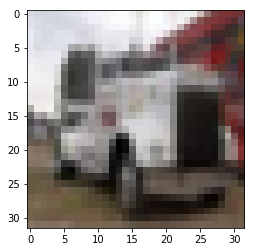

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 49999)
print("標籤:", mapdict[y_train[c][0]])
plt.imshow(x_train[c])

In [16]:
# normalize: (0~1)
x_train_shape = x_train / 255
x_test_shape = x_test / 255
# 目標: one-hot encoding
from keras.utils import np_utils
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
cnn = Sequential()
# 第一層: 把input shape設好
cnn.add(Conv2D(input_shape=(32, 32, 3), 
               kernel_size=(3, 3), 
               filters=32, 
               padding="same", 
               activation="relu"))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(Conv2D(kernel_size=(3, 3), 
               filters=64, 
               padding="same", 
               activation="relu"))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(Conv2D(kernel_size=(3, 3), 
               filters=128, 
               padding="same", 
               activation="relu"))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(units=256, activation="relu"))
cnn.add(Dense(units=10, activation="softmax"))
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
__________

In [25]:
# 二分:binary_crossentropy
# 多元:categorical_crossentropy
cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
# batch_size: 每看幾筆做一次梯度更新(100~200)
# epochs: 每一筆資料要看過幾次
# 總梯度更新次數: 資料筆數 * epochs / batch_size
# validation_split: train_test_split
# verbose: 輸出log的程度, 2
train_history = cnn.fit(x_train_shape, y_train_onehot, batch_size=200, 
                epochs=10, validation_split=0.1, verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
 - 49s - loss: 1.5912 - acc: 0.4219 - val_loss: 1.3113 - val_acc: 0.5308
Epoch 2/10
 - 48s - loss: 1.1930 - acc: 0.5755 - val_loss: 1.0910 - val_acc: 0.6142
Epoch 3/10
 - 47s - loss: 1.0120 - acc: 0.6454 - val_loss: 0.9688 - val_acc: 0.6706
Epoch 4/10
 - 47s - loss: 0.8895 - acc: 0.6902 - val_loss: 0.9232 - val_acc: 0.6834
Epoch 5/10
 - 47s - loss: 0.8087 - acc: 0.7209 - val_loss: 0.8310 - val_acc: 0.7196
Epoch 6/10
 - 47s - loss: 0.7280 - acc: 0.7490 - val_loss: 0.7850 - val_acc: 0.7300
Epoch 7/10
 - 47s - loss: 0.6629 - acc: 0.7693 - val_loss: 0.7741 - val_acc: 0.7336
Epoch 8/10
 - 47s - loss: 0.6086 - acc: 0.7897 - val_loss: 0.7541 - val_acc: 0.7426
Epoch 9/10
 - 47s - loss: 0.5470 - acc: 0.8106 - val_loss: 0.7612 - val_acc: 0.7490
Epoch 10/10
 - 49s - loss: 0.4918 - acc: 0.8303 - val_loss: 0.7433 - val_acc: 0.7586


In [27]:
cnn.evaluate(x_test_shape, y_test_onehot)

10000/10000 [==============================] - 5s 452us/step


[0.7673921218872071, 0.7442]

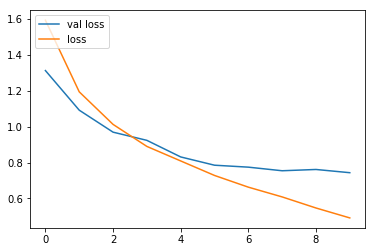

In [28]:
# 怎麼看幾次要停 - val_loss(藍線) -> 平緩 就可以停
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_history.history["val_loss"])
plt.plot(train_history.history["loss"])
plt.legend(["val loss", "loss"], loc="upper left")

In [30]:
import pandas as pd
# {0:"飛機", 1:"汽車", 2:"鳥", 3:"貓", 4:"鹿", 5:"狗", 6:"青蛙",7:"馬", 8:"船", 9:"貨車"}
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(cnn.predict_classes(x_test_shape), y_test))

,0,1,2,3,4,5,6,7,8,9
0,766,12,59,16,19,17,6,12,43,30
1,30,886,8,15,7,12,13,6,39,84
2,49,5,657,68,63,49,53,36,11,14
3,24,3,58,630,70,214,102,32,17,16
4,14,2,76,58,686,43,40,33,7,1
5,3,2,38,90,25,561,15,16,4,7
6,5,3,43,30,32,11,743,1,1,3
7,11,2,41,62,85,81,8,850,6,14
8,53,18,9,14,11,8,11,4,851,19
9,45,67,11,17,2,4,9,10,21,812
